<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_4_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

## Demonstration 4.2.2 Exploring PCA
The USA Modified National Institute of Standards and Technology (MNIST) data set contains 70,000 images of handwritten digits between 0 and 9. Each grayscale image consists of 28x28 pixels. Each pixel value is a single byte of 0 to 255, representing the grayscale intensity.

The MNIST data set is widely used in machine learning to test and benchmark algorithms. In this demonstration, we will employ PCA on a multi-dimensional data set. In this demonstration, you will learn how to:
- Employ normalisation.
- Employ PCA and visualise 2D data.
- Interpret the PCA output.
- Apply feature selection and interpret plot variance and cumulative variance.



In [ ]:
# Import the required libraries and functions.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# Load the MNIST data set.
# Note: Importing the data might take a minute or two.
mnist = fetch_openml('mnist_784', version=1)

# Specify the dependent and independent variables.
X, y = mnist.data, mnist.target

# Convert labels to integers for plotting and colour coding.
y = y.astype(int)

# Determine the number of the original data set.
X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [ ]:
# Create a random subset of 5,000 rows.
n_samples = 5000

# Use NumPy to select samples randomly.
np.random.seed(42)

# Only select a sample once.
indices = np.random.choice(len(X),
                           n_samples,
                           replace=False)

In [ ]:
# Create a subset for each variable.
X_subset = X.iloc[indices].values
y_subset = y.iloc[indices].values

# Determine the size of the subset.
print(X_subset.shape)

In [ ]:
# View the output classes.
np.unique(y_subset)

(5000, 784)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 1. Apply feature scaling.
# Normalise the data.
scaler = StandardScaler()
X_normalised = scaler.fit_transform(X_subset)

In [ ]:
# 2. Apply PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalised)

In [ ]:
# Compare the shape of the normalised and PCA data.
print("Normalised data: ", X_normalised.shape)
print("PCA data for visualisation: ", X_pca.shape)

Normalised data:  (5000, 784)
PCA data for visualisation:  (5000, 2)


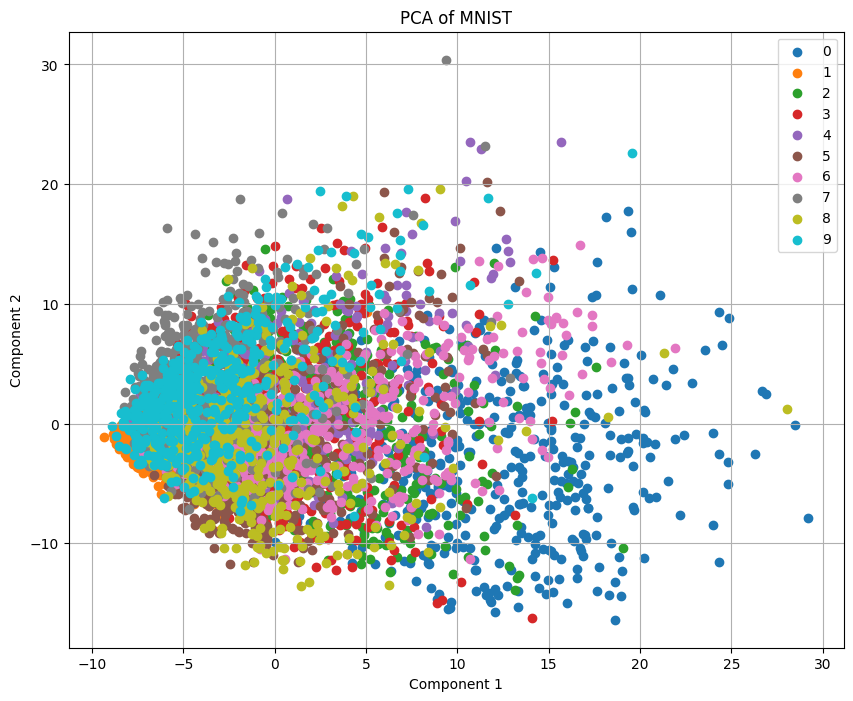

In [ ]:
# Visualise the reduced data in 2D.
def plot_embedding(X, title, y_subset):
    plt.figure(figsize=(10, 8))
    for i in range(len(np.unique(y_subset))):
        plt.scatter(X[y_subset == i, 0],
                    X[y_subset == i, 1],
                    label=str(i))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding(X_pca, "PCA of MNIST", y_subset)

In [ ]:
# Use PCA for feature selection.
def plot_variance(pca, width=8, dpi=100):
    # Create a figure.
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explain the variance.
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component",
               title="% Explained variance",
               ylim=(0.0, 1.0))

    # Use cumulative variance.
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component",
               title="% Cumulative variance",
               ylim=(0.0, 1.0))
    # Set up the figure.
    fig.set(figwidth=8, dpi=100)
    return axs

In [ ]:
# Set the number of components to 20.
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_normalised)

In [ ]:
# Create a DataFrame.
df = pd.DataFrame({
    'PC': range(1, len(pca.explained_variance_ratio_) + 1),
    'Explained Variance': pca.explained_variance_ratio_
})

# Print the DataFrame.
print(df.to_string(index=False))

 PC  Explained Variance
  1            0.060460
  2            0.044552
  3            0.040028
  4            0.031780
  5            0.027378
  6            0.024073
  7            0.021101
  8            0.018929
  9            0.017018
 10            0.015320
 11            0.014350
 12            0.013173
 13            0.012297
 14            0.011685
 15            0.011648
 16            0.011088
 17            0.010290
 18            0.010076
 19            0.009670
 20            0.009433


array([<Axes: title={'center': '% Explained variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative variance'}, xlabel='Component'>],
      dtype=object)

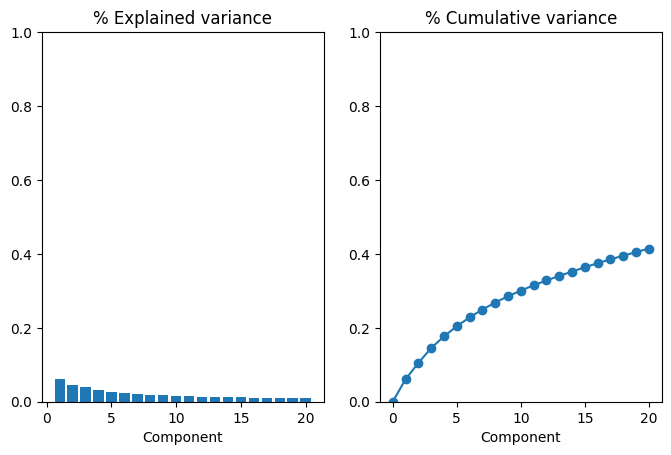

In [ ]:
# View the variance and cumulative variance.
plot_variance(pca)

array([<Axes: title={'center': '% Explained variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative variance'}, xlabel='Component'>],
      dtype=object)

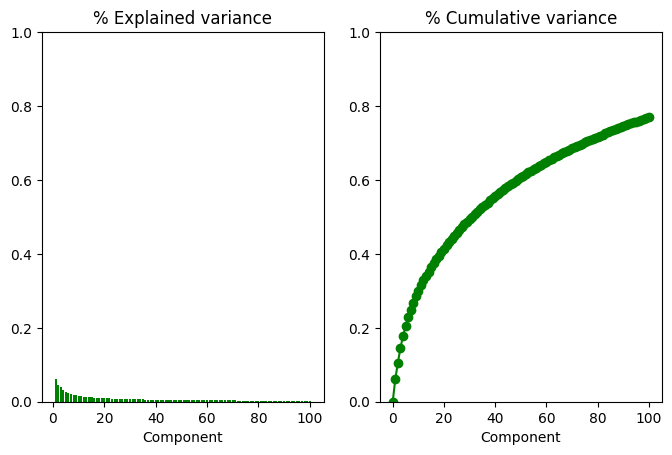

In [ ]:
# Use PCA for feature selection.
def plot_variance(pca, width=8, dpi=100):
    # Create a figure.
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explain the variance.
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr, color='green')
    axs[0].set(xlabel="Component",
               title="% Explained variance",
               ylim=(0.0, 1.0))

    # Use cumulative variance.
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv],
                "o-", color='green')
    axs[1].set(xlabel="Component",
               title="% Cumulative variance",
               ylim=(0.0, 1.0))
    # Set up the figure.
    fig.set(figwidth=8, dpi=100)
    return axs

# Change the number of components to 100.
pca_2 = PCA(n_components=100)
X_pca_2 = pca_2.fit_transform(X_normalised)

# View the variance and cumulative variance.
plot_variance(pca_2)

array([<Axes: title={'center': '% Explained variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative variance'}, xlabel='Component'>],
      dtype=object)

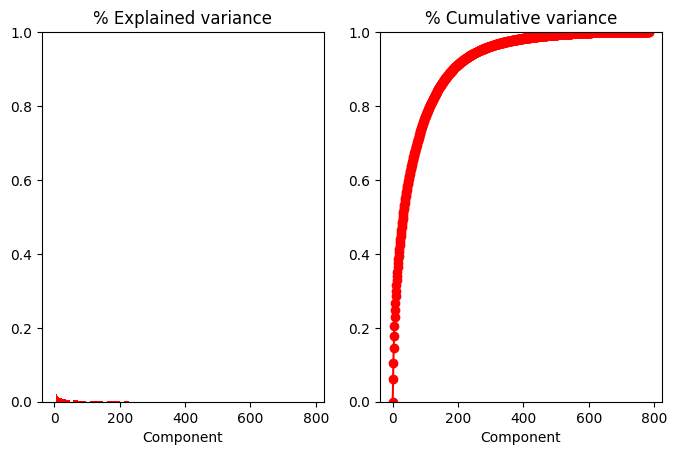

In [ ]:
# Use PCA for feature selection.
def plot_variance(pca, width=8, dpi=100):
    # Create a figure.
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explain the variance.
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr, color='red')
    axs[0].set(xlabel="Component",
               title="% Explained variance",
               ylim=(0.0, 1.0))

    # Use cumulative variance.
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv],
                "o-", color='red')
    axs[1].set(xlabel="Component",
               title="% Cumulative variance",
               ylim=(0.0, 1.0))
    # Set up the figure.
    fig.set(figwidth=8, dpi=100)
    return axs

# Change the number of components to 784.
pca_3 = PCA(n_components=784)
X_pca_3 = pca_3.fit_transform(X_normalised)

# View the variance and cumulative variance.
plot_variance(pca_3)

> **Note:**
> - 20 principal components explain about 40% of the overall variance.
> - 100 principal components explain about 80% of the overall variance.
> - 784 principal components explain 100% of the overall variance.

In [ ]:
# Calculate the mutual information (MI) score if the number of PA components is 20.
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Convert the output into a DataFrame.
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
mi_scores = make_mi_scores(X_pca, y_subset, discrete_features=False)

# View the output.
mi_scores

PC3     0.547862
PC4     0.546113
PC1     0.452643
PC5     0.346583
PC6     0.272666
PC9     0.203024
PC8     0.203001
PC13    0.200916
PC7     0.177982
PC2     0.169695
PC20    0.160263
PC10    0.148683
PC16    0.140040
PC11    0.133758
PC12    0.118002
PC15    0.116476
PC18    0.113766
PC19    0.084540
PC17    0.082583
PC14    0.076489
Name: MI Scores, dtype: float64

#### The wine data set.
This is a smaller data set.

In [ ]:
# Import the data set and create a DataFrame.
wine = load_wine()
df_wine = pd.DataFrame(wine.data,
                       columns=wine.feature_names)

# View the shape.
print(wine.data.shape)
print(df_wine.shape)

(178, 13)
(178, 13)


In [ ]:
# Specify the variable.
y = wine.target

# View the data.
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# 1. Normalise the data.
df_wine = StandardScaler().fit_transform(df_wine)

df_wine = pd.DataFrame(df_wine,
                       columns=wine.feature_names)

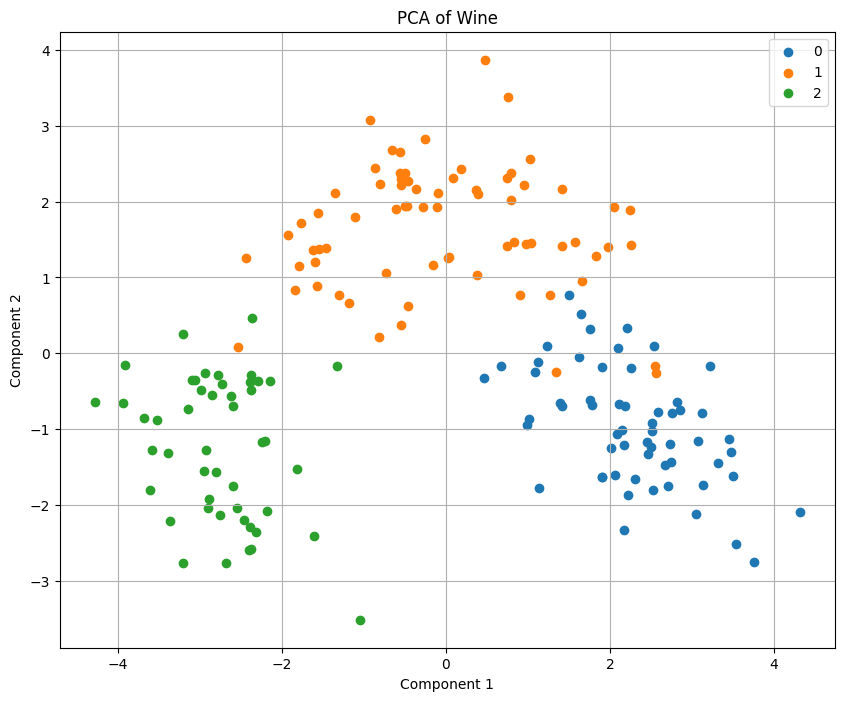

In [ ]:
# 2. Apply PCA.
pca = PCA(n_components=2)
pca_model = pca.fit(df_wine)

df_trans = pd.DataFrame(pca_model.transform(df_wine),
                        columns=['pca1', 'pca2'])

# Create a plot.
plot_embedding(pca_model.transform(df_wine), "PCA of Wine", y)

In [ ]:
# 3. Use PCA for feature selection.
pca = PCA(n_components=7)
X_pca = pca.fit_transform(df_wine)

array([<Axes: title={'center': '% Explained variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative variance'}, xlabel='Component'>],
      dtype=object)

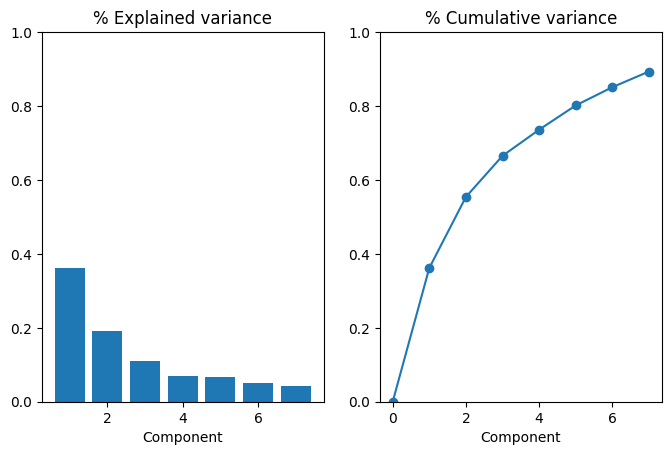

In [ ]:
# View the variance and cumulative variance.
plot_variance(pca)

In [ ]:
# Convert to a DataFrame and show the mutual information score.
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.752398
PC2    0.583270
PC5    0.065381
PC3    0.056536
PC6    0.038756
PC7    0.024628
PC4    0.000000
Name: MI Scores, dtype: float64

# Key information
This demonstration illustrated the importance of dimension reduction with PCA and how to interpret the output based on understanding the business context.


## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.